In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# -- read_csv --
df = pd.read_csv("financial_loan.csv")

df.shape

(38576, 24)

In [3]:
df.sample(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
32819,496326,OH,INDIVIDUAL,2 years,Starbucks,A,RENT,10-03-2021,15-09-2021,13-04-2021,...,A4,36 months,Not Verified,21600.0,0.2133,108.89,0.0751,3500,8,3920
27975,645644,PA,INDIVIDUAL,5 years,"The SI Organizatation, INC.",A,RENT,11-01-2021,16-05-2021,12-06-2021,...,A1,36 months,Not Verified,69350.0,0.0768,325.73,0.0542,10800,26,11426
21521,805289,NY,INDIVIDUAL,10+ years,Paul Effman Music Service,E,RENT,11-07-2021,12-01-2021,11-12-2021,...,E5,60 months,Source Verified,130000.0,0.0453,593.56,0.1969,35000,6,24363
11201,710014,CA,INDIVIDUAL,< 1 year,Cypress Semiconductor,B,RENT,11-03-2021,12-04-2021,12-04-2021,...,B4,36 months,Not Verified,90000.0,0.0355,430.53,0.1074,13200,6,14018
21528,652961,FL,INDIVIDUAL,3 years,Bank of America Merrill Lynch,E,RENT,11-02-2021,16-03-2021,16-03-2021,...,E4,60 months,Source Verified,57000.0,0.1448,402.05,0.1751,16000,12,24122


In [3]:
# -- now checking null values 
df.isnull().sum()  # there is only one value that is null 

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [4]:
# no duplicated()  
df.duplicated().sum()

0

In [9]:
# checking dtypes of there --
for i in df: 
    a=df[i].dtypes
    print(f"{i} : -  {a} ")

id : -  int64 
address_state : -  object 
application_type : -  object 
emp_length : -  object 
emp_title : -  object 
grade : -  object 
home_ownership : -  object 
issue_date : -  object 
last_credit_pull_date : -  object 
last_payment_date : -  object 
loan_status : -  object 
next_payment_date : -  object 
member_id : -  int64 
purpose : -  object 
sub_grade : -  object 
term : -  object 
verification_status : -  object 
annual_income : -  float64 
dti : -  float64 
installment : -  float64 
int_rate : -  float64 
loan_amount : -  int64 
total_acc : -  int64 
total_payment : -  int64 


In [22]:
# sepearated -- int and object separately 
df_num = df[df.dtypes[df.dtypes !="object"].index]
df_obj = df[df.dtypes[df.dtypes == "object"].index]

In [34]:
# finding corr values 
a=df_num.corr()
a

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
id,1.000000,0.993609,0.012234,0.095496,0.090631,0.083235,0.146818,0.043469,0.144655
member_id,0.993609,1.000000,0.013138,0.096723,0.085360,0.079246,0.145916,0.045824,0.144906
annual_income,0.012234,0.013138,1.000000,-0.124877,0.267362,0.050665,0.268183,0.234334,0.254611
dti,0.095496,0.096723,-0.124877,1.000000,0.053381,0.112978,0.065713,0.230405,0.064319
installment,0.090631,0.085360,0.267362,0.053381,1.000000,0.280959,0.929655,0.229785,0.857745
int_rate,0.083235,0.079246,0.050665,0.112978,0.280959,1.000000,0.308243,-0.041670,0.308844
loan_amount,0.146818,0.145916,0.268183,0.065713,0.929655,0.308243,1.000000,0.255468,0.887490
total_acc,0.043469,0.045824,0.234334,0.230405,0.229785,-0.041670,0.255468,1.000000,0.223542
total_payment,0.144655,0.144906,0.254611,0.064319,0.857745,0.308844,0.887490,0.223542,1.000000


<AxesSubplot: >

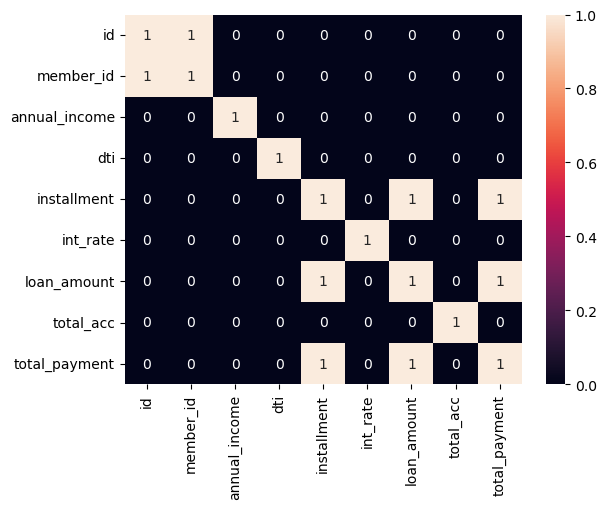

In [35]:
sns.heatmap(a>.6,annot=True)

<AxesSubplot: xlabel='loan_amount', ylabel='loan_status'>

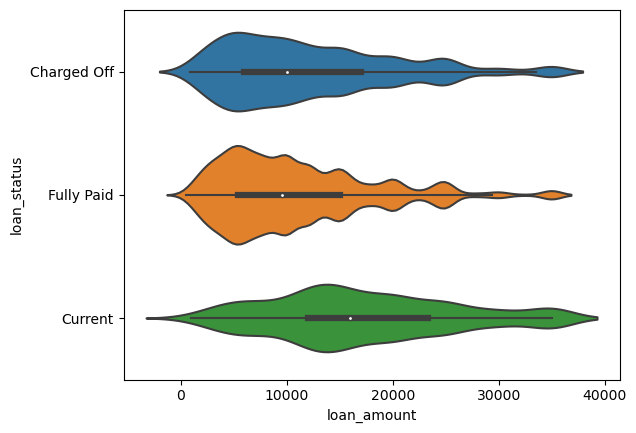

In [4]:
sns.violinplot(data=df,x=df['loan_amount'],y=df['loan_status'])